In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv')

In [3]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Defining y & X**

In [4]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [5]:
y= df['diabetes']
X= df.drop('diabetes', axis=1)

In [7]:
X.shape, y.shape

((768, 8), (768,))

In [8]:
y.value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

**Building a Model**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=y, random_state=2529)

**We will use Scaling method here**

In [16]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(X_train)

StandardScaler()

In [17]:
X_train_ss=ss.transform(X_train)
X_test_ss=ss.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knnc= KNeighborsClassifier(n_neighbors=5)

In [19]:
knnc.fit(X_train_ss, y_train)

KNeighborsClassifier()

In [20]:
y_pred=knnc.predict(X_test_ss)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       125
           1       0.65      0.64      0.65        67

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



**Error Rate and keeping K value in loop**

In [23]:
error_rate= [ ]
for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i= knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_pred) )

In [25]:
print(np.sort(error_rate))

[0.140625   0.140625   0.140625   0.14583333 0.14583333 0.15104167
 0.15625    0.15625    0.16145833 0.16145833 0.16145833 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.171875   0.171875
 0.171875   0.171875   0.171875   0.17708333 0.17708333 0.17708333
 0.17708333 0.17708333 0.18229167 0.1875     0.1875     0.19270833
 0.19270833 0.203125   0.265625  ]


**This returns the Index(argsort)**

In [26]:
print(np.argsort(error_rate))

[16 30 28 31 26 29 32  9 20 34  6 21 27 18 17 38 10  8 33  4 35 15 36 24
 19 14 11 22 37 13  5  3 25  7 23 12  2  1  0]


Minimum error:- 0.140625 at K = 16


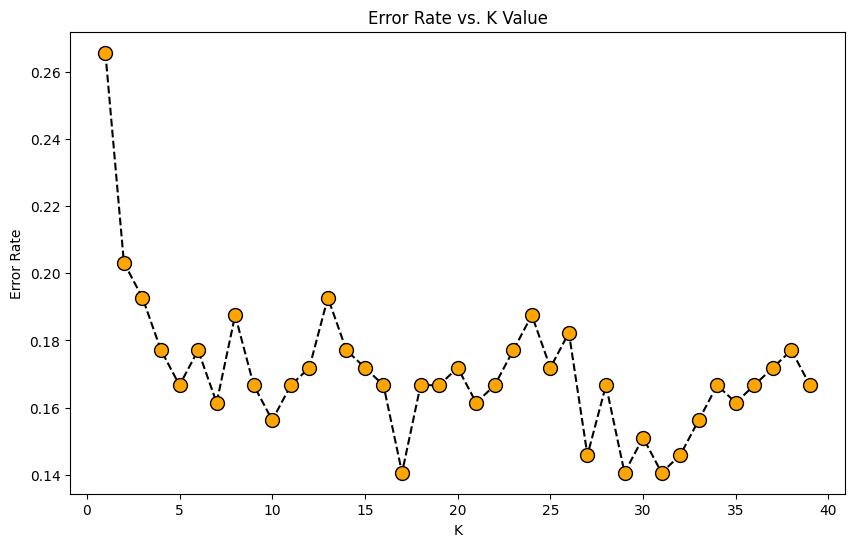

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed',
         marker='o',markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))